In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
%matplotlib inline

In [3]:
!head complaints_dec_2014.csv 

Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
1177167,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,
1177166,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,
1177165,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,
1177164,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,
1177163,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhan

In [4]:
!tail complaints_dec_2014.csv

1136185,Consumer loan,Vehicle loan,Problems when you are unable to pay,,TX,78577,Web,12/01/2014,12/01/2014,JPMorgan Chase,Closed with explanation,Yes,
1136183,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",,NY,11230,Referral,12/01/2014,12/05/2014,PNC Bank,Closed,Yes,
1136180,Debt collection,"Other (phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,CA,92124,Web,12/01/2014,12/01/2014,Stellar Recovery Inc.,Closed with explanation,Yes,
1136175,Debt collection,Payday loan,False statements or representation,Attempted to collect wrong amount,IN,46637,Web,12/01/2014,12/01/2014,"Interstate Recovery Service, Inc.",Closed with explanation,No,
1136173,Credit reporting,,Incorrect information on credit report,Account status,VA,23224,Postal mail,12/01/2014,12/05/2014,Experian,Closed with explanation,Yes,Yes
1136172,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",,LA,70452,Web,12/01/2014,12/05/2014,"Servis One, Inc.",C

In [5]:
customer_comps = pd.read_csv('complaints_dec_2014.csv')
customer_comps

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN
5,1177162,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN
6,1177154,Credit card,NaN,Billing disputes,NaN,GA,31322,Web,12/31/2014,01/07/2015,Amex,Closed with explanation,Yes,NaN
7,1177143,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,AZ,85023,Web,12/31/2014,01/07/2015,Speedy Cash Holdings,Closed,Yes,NaN
8,1177140,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,12/31/2014,"Afni, Inc.",Closed with explanation,Yes,NaN
9,1177139,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN


In [6]:
type(customer_comps)

pandas.core.frame.DataFrame

In [7]:
customer_comps.describe()

,Complaint ID,ZIP code
count,11543.000000,11409.000000
mean,1157276.786451,50259.375756
std,11908.384438,30712.384693
min,1136157.000000,10.000000
25%,1146708.500000,23234.000000
50%,1156954.000000,44203.000000
75%,1167656.000000,78623.000000
max,1178091.000000,99712.000000


In [8]:
customer_comps.columns

Index(['Complaint ID', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'State',
       'ZIP code', 'Submitted via', 'Date received', 'Date sent to company',
       'Company', 'Company response', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')

In [9]:
customer_comps.Product.unique()

array(['Debt collection', 'Credit card', 'Bank account or service',
       'Credit reporting', 'Mortgage', 'Money transfers', 'Consumer loan',
       'Student loan', 'Payday loan', 'Prepaid card',
       'Other financial service'], dtype=object)

In [10]:
date_set = customer_comps.pop('Date received')

In [11]:
pd.to_datetime(date_set, format='%m/%d/%Y').head()#thanks to james on slack

0   2014-12-31
1   2014-12-31
2   2014-12-31
3   2014-12-31
4   2014-12-31
Name: Date received, dtype: datetime64[ns]

In [12]:
date_set.head

<bound method Series.head of 0        12/31/2014
1        12/31/2014
2        12/31/2014
3        12/31/2014
4        12/31/2014
5        12/31/2014
6        12/31/2014
7        12/31/2014
8        12/31/2014
9        12/31/2014
10       12/31/2014
11       12/31/2014
12       12/31/2014
13       12/31/2014
14       12/31/2014
15       12/31/2014
16       12/31/2014
17       12/31/2014
18       12/31/2014
19       12/31/2014
20       12/31/2014
21       12/31/2014
22       12/31/2014
23       12/31/2014
24       12/31/2014
25       12/31/2014
26       12/31/2014
27       12/31/2014
28       12/31/2014
29       12/31/2014
            ...    
11513    12/01/2014
11514    12/01/2014
11515    12/01/2014
11516    12/01/2014
11517    12/01/2014
11518    12/01/2014
11519    12/01/2014
11520    12/01/2014
11521    12/01/2014
11522    12/01/2014
11523    12/01/2014
11524    12/01/2014
11525    12/01/2014
11526    12/01/2014
11527    12/01/2014
11528    12/01/2014
11529    12/01/2014
11530    12

In [13]:
date_set.tail

<bound method Series.tail of 0        12/31/2014
1        12/31/2014
2        12/31/2014
3        12/31/2014
4        12/31/2014
5        12/31/2014
6        12/31/2014
7        12/31/2014
8        12/31/2014
9        12/31/2014
10       12/31/2014
11       12/31/2014
12       12/31/2014
13       12/31/2014
14       12/31/2014
15       12/31/2014
16       12/31/2014
17       12/31/2014
18       12/31/2014
19       12/31/2014
20       12/31/2014
21       12/31/2014
22       12/31/2014
23       12/31/2014
24       12/31/2014
25       12/31/2014
26       12/31/2014
27       12/31/2014
28       12/31/2014
29       12/31/2014
            ...    
11513    12/01/2014
11514    12/01/2014
11515    12/01/2014
11516    12/01/2014
11517    12/01/2014
11518    12/01/2014
11519    12/01/2014
11520    12/01/2014
11521    12/01/2014
11522    12/01/2014
11523    12/01/2014
11524    12/01/2014
11525    12/01/2014
11526    12/01/2014
11527    12/01/2014
11528    12/01/2014
11529    12/01/2014
11530    12

In [14]:
customer_comps.Product.value_counts()

Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
dtype: int64

In [15]:
customer_comps.index = pd.to_datetime(date_set, format='%m/%d/%Y')

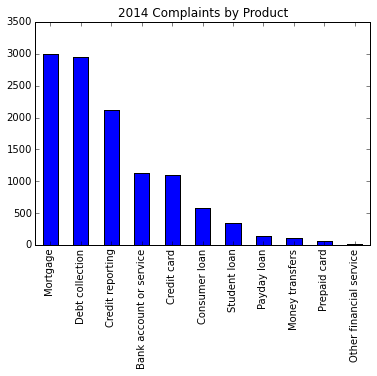

In [16]:
customer_comps.Product.value_counts().plot(title='2014 Complaints by Product',kind= 'bar')
plt.show()

In [17]:
customer_comps.Company.value_counts()[:10]

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
dtype: int64

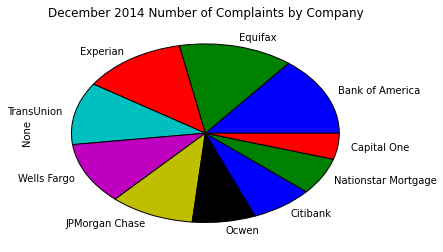

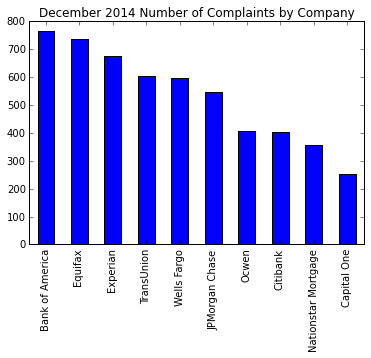

In [18]:
customer_comps.Company.value_counts()[:10].plot(title='December 2014 Number of Complaints by Company', kind='pie')
plt.show()
customer_comps.Company.value_counts()[:10].plot(title='December 2014 Number of Complaints by Company', kind='bar')
plt.show()


In [19]:
##Three of the top four companies are credit reporting agencies. People may be trying to correct credit issues
#in time for the holidays.

In [20]:
customer_comps['Company response'].value_counts()

Closed with explanation            8185
Closed with non-monetary relief    1253
In progress                        1056
Closed with monetary relief         643
Closed                              239
Untimely response                   167
dtype: int64

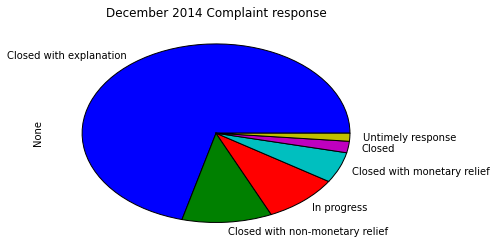

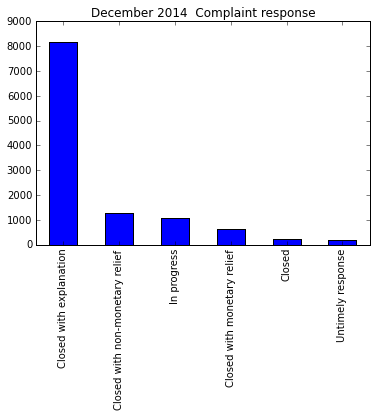

In [21]:
customer_comps['Company response'].value_counts()[:10].plot(title='December 2014 Complaint response', kind='pie')
plt.show()
customer_comps['Company response'].value_counts()[:10].plot(title='December 2014  Complaint response', kind='bar')
plt.show()


In [22]:
## It seems like most who  call to complain and may be having their situations explained and closed without incedent

In [23]:
data_copy=customer_comps.copy()

In [25]:
data_copy['Weekday']=data_copy.index.weekday
data_copy1 = data_copy.replace({'Weekday': {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday',5: 'Saturday', 6: 'Sunday'}})

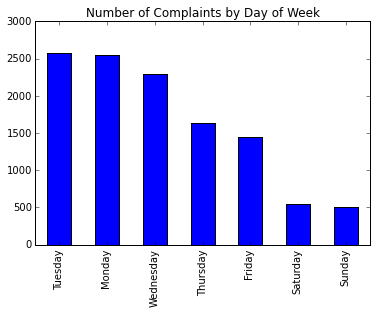

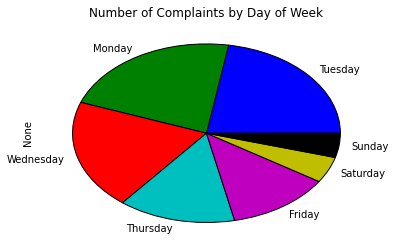

In [26]:
data_copy1.Weekday.value_counts().plot(title='Number of Complaints by Day of Week', kind='bar')
plt.show()
data_copy1.Weekday.value_counts().plot(title='Number of Complaints by Day of Week', kind='pie')
plt.show()

In [ ]:
# ## There are more complaints during the beginningof the week and decreasing toward the end of the week. Mayabe people prefer
# to take care of business and get their situation in line before the weekend. Also, Nobody wants to deal with things like
# this on the weekend

In [ ]:
res= [date_counts[date_counts]